### 데이터 살펴보기

In [1]:
import numpy as anp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')
submission_df = pd.read_csv('data/sampleSubmission.csv')

In [5]:
train_df.shape

(10886, 12)

In [7]:
test_df.shape

(6493, 9)

In [11]:
train_df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [15]:
test_df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed'],
      dtype='object')

In [17]:
train_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [19]:
test_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [21]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [23]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [25]:
train_df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [27]:
train_df.describe(include='object')

,datetime
count,10886
unique,10886
top,2011-01-01 00:00:00
freq,1


In [29]:
train_df['datetime'] = pd.to_datetime(train_df['datetime'])
train_df['year'] = train_df['datetime'].dt.year
train_df['month'] = train_df['datetime'].dt.month
train_df['day'] = train_df['datetime'].dt.day
train_df['hour'] = train_df['datetime'].dt.hour
train_df['minute'] = train_df['datetime'].dt.minute
train_df['second'] = train_df['datetime'].dt.second
train_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


In [31]:
print(train_df['minute'].value_counts())
print(train_df['second'].value_counts()) 

minute
0    10886
Name: count, dtype: int64
second
0    10886
Name: count, dtype: int64


In [33]:
train_df = train_df.drop(['minute', 'second'], axis=1)
train_df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour'],
      dtype='object')

In [35]:
test_df['datetime'] = pd.to_datetime(test_df['datetime'])
test_df['year'] = test_df['datetime'].dt.year
test_df['month'] = test_df['datetime'].dt.month
test_df['day'] = test_df['datetime'].dt.day
test_df['hour'] = test_df['datetime'].dt.hour

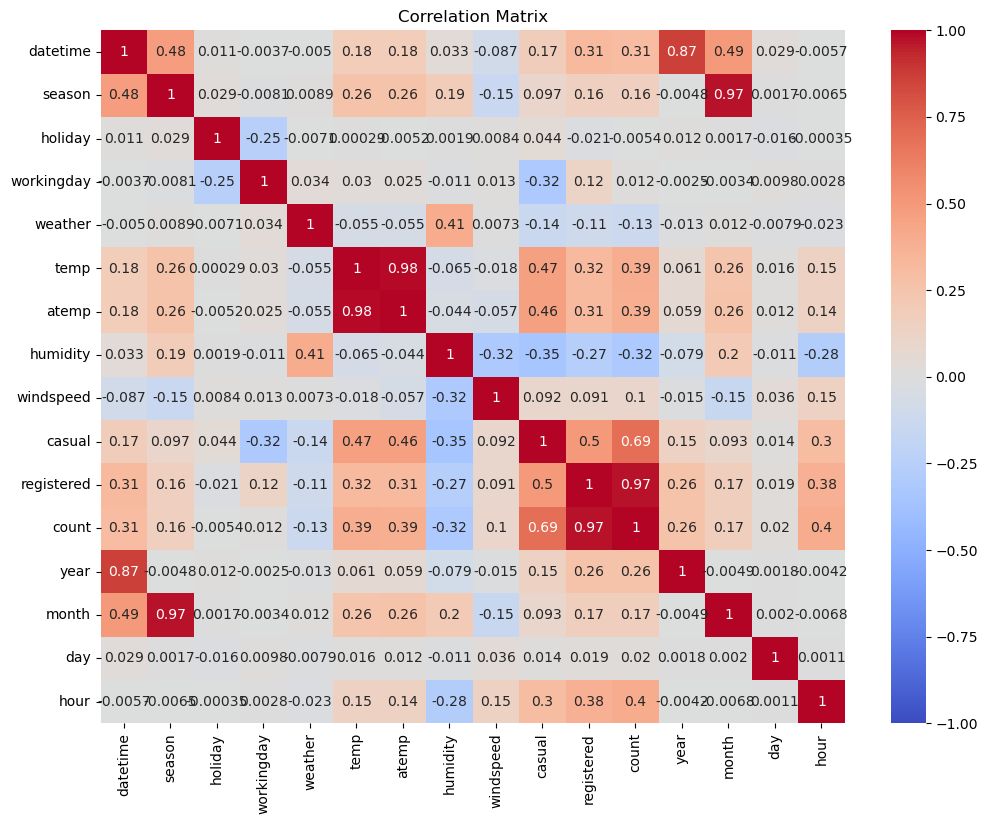

In [37]:
df = pd.DataFrame(train_df)

# 상관 계수 계산
correlation_matrix = df.corr()

# 상관 계수 히트맵 시각화
plt.figure(figsize=(12,9))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, vmax=1, vmin=-1, center=0, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [39]:
submission_df.shape

(6493, 2)

submission_df.head()

### 모델 학습 및 답안 제출

In [45]:
X = train_df.drop(columns='count')
y = train_df['count']

In [47]:
X = train_df.drop(columns=['count', 'casual', 'registered', 'datetime'])
y = train_df['count']

In [49]:
X_test = test_df.drop(columns=['datetime'])

In [51]:
print(f'Train data shape: {X.shape}')
print(f'Number of null values: {X.isna().sum().sum()}')
print(f'\nTest data shape: {X_test.shape}')
print(f'Number of null values: {X_test.isna().sum().sum()}')

Train data shape: (10886, 12)
Number of null values: 0

Test data shape: (6493, 12)
Number of null values: 0


In [53]:
def separate_train(df): # 'count' 피쳐를 y로 구분
    X = df.drop(['datetime', 'casual', 'registered', 'count'], axis=1)
    y = df['count']
    return X, y

def separate_test(df): # 'count' 피쳐를 y로 구분
    X_test = df.drop('datetime', axis=1)
    return X_test

In [55]:
X, y = separate_train(train_df)
X_test = separate_test(test_df)

print(f'Train data shape: {X.shape}')
print(f'Number of null values: {X.isna().sum().sum()}')
print(f'\nTest data shape: {X_test.shape}')
print(f'Number of null values: {X_test.isna().sum().sum()}')

Train data shape: (10886, 12)
Number of null values: 0

Test data shape: (6493, 12)
Number of null values: 0


In [65]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [61]:
y_valid_pred = model.predict(X_valid)

In [67]:
from sklearn.metrics import mean_squared_log_error

rmsle = np.sqrt(mean_squared_log_error(y_valid, y_valid_pred))
print(f'\nValidation Data RMSLE: {rmsle:.5f}')

ValueError: Mean Squared Logarithmic Error cannot be used when targets contain negative values.

In [69]:
y_valid_pred = np.maximum(0, y_valid_pred)

In [71]:
rmsle = np.sqrt(mean_squared_log_error(y_valid, y_valid_pred))
print(f'Validation Data RMSLE: {rmsle:.5f}')

Validation Data RMSLE: 1.30575


In [73]:
y_test_pred = model.predict(X_test)
y_test_pred = np.maximum(0, y_test_pred)

In [75]:
submission_df['count'] = y_test_pred
submission_df.to_csv('submission_baseline.csv', index=False)
submission_df 

,datetime,count
0,2011-01-20 00:00:00,0.000000
1,2011-01-20 01:00:00,0.000000
2,2011-01-20 02:00:00,0.000000
3,2011-01-20 03:00:00,0.000000
4,2011-01-20 04:00:00,0.000000
...,...,...
6488,2012-12-31 19:00:00,299.166115
6489,2012-12-31 20:00:00,307.029709
6490,2012-12-31 21:00:00,320.079545
6491,2012-12-31 22:00:00,338.774422


### 피쳐 엔지니어링을 위한 데이터 탐색

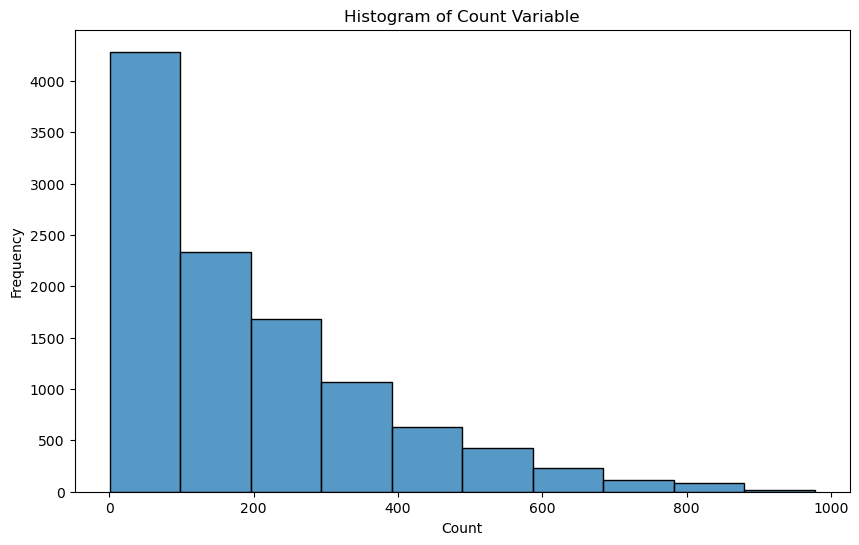

In [95]:
plt.figure(figsize=(10, 6))
sns.histplot(data=train_df, x='count', bins=10)
plt.title('Histogram of Count Variable')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.show()

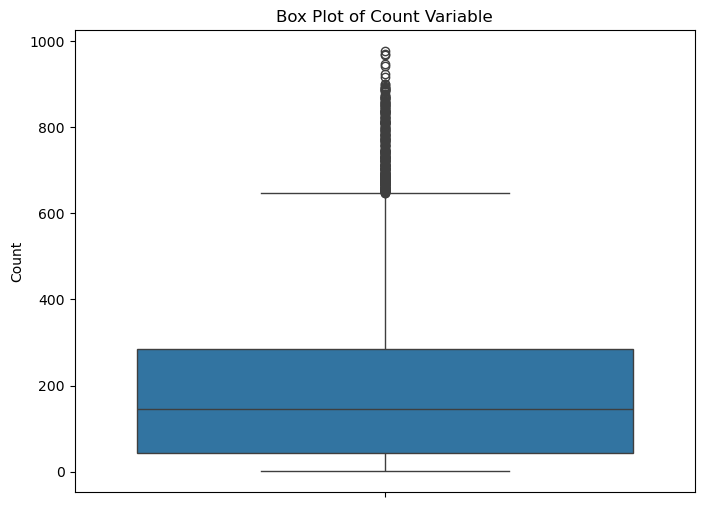

In [97]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=train_df, y='count')
plt.title('Box Plot of Count Variable')
plt.ylabel('Count')
plt.show()

In [99]:
train_df['count'].min()

1

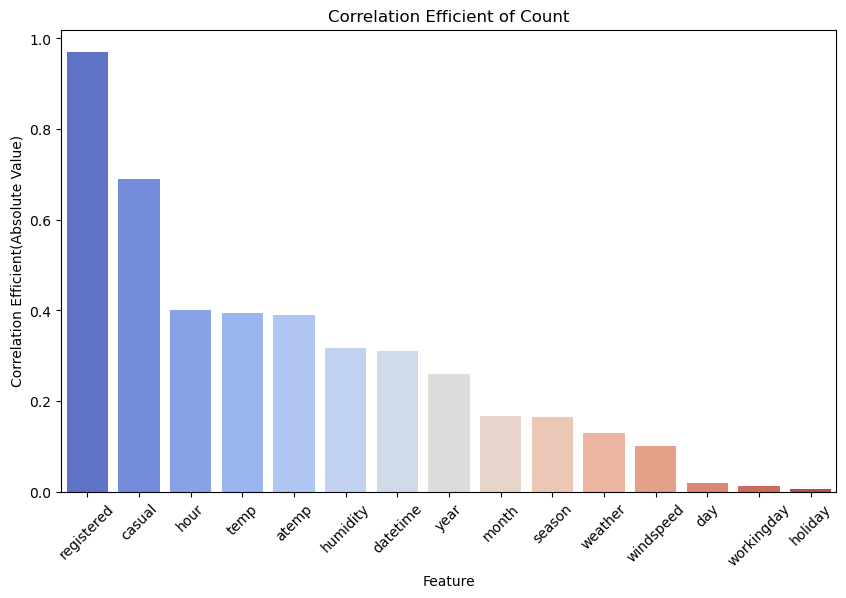

In [101]:
corr_df = correlation_matrix['count'].abs().sort_values(ascending=False).drop('count')

plt.figure(figsize=(10, 6))
sns.barplot(data=corr_df.reset_index(), x='index', y='count', hue='index', palette='coolwarm', legend=False)
plt.xlabel('Feature')
plt.ylabel('Correlation Efficient(Absolute Value)')
plt.title('Correlation Efficient of Count')
plt.xticks(rotation=45)
plt.show()

In [103]:
for col in ['year', 'month', 'day', 'hour'] :
  unique_values = train_df[col].unique()
  unique_values.sort()
  print(col)
  print(unique_values)

year
[2011 2012]
month
[ 1  2  3  4  5  6  7  8  9 10 11 12]
day
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
hour
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


In [105]:
for col in ['year', 'month', 'day', 'hour'] :
    unique_values = sorted(test_df[col].unique())
    print(col)
    print(unique_values)

year
[2011, 2012]
month
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
day
[20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
hour
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


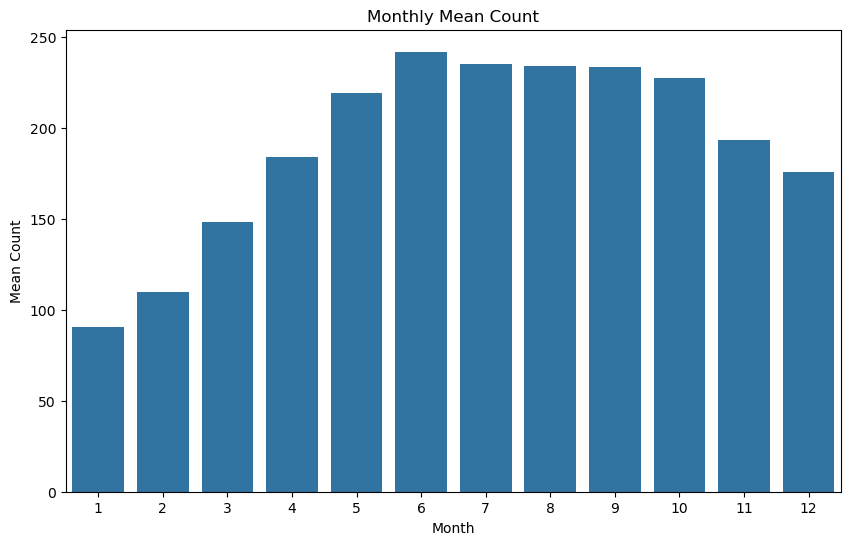

In [107]:
plt.figure(figsize=(10, 6))
sns.barplot(data=train_df, x='month', y='count', errorbar=None)
plt.title('Monthly Mean Count')
plt.xlabel('Month')
plt.ylabel('Mean Count')
plt.show()

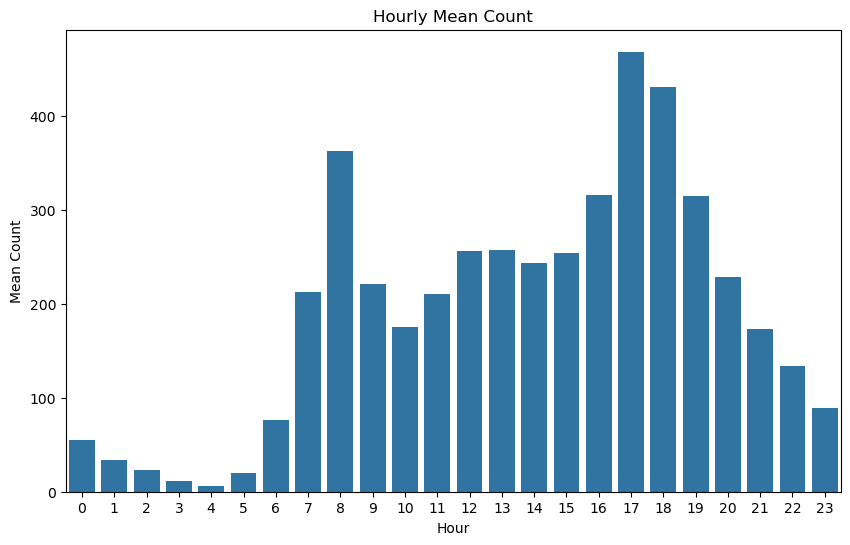

In [109]:
plt.figure(figsize=(10, 6))
sns.barplot(data=train_df, x='hour', y='count', errorbar=None)
plt.title('Hourly Mean Count')
plt.xlabel('Hour')
plt.ylabel('Mean Count')
plt.show()

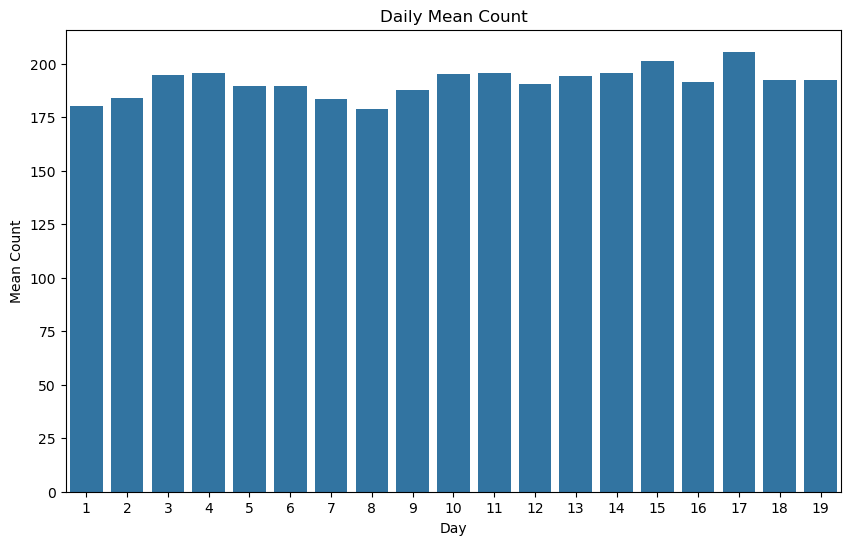

In [111]:
plt.figure(figsize=(10, 6))
sns.barplot(data=train_df, x='day', y='count', errorbar=None)
plt.title('Daily Mean Count')
plt.xlabel('Day')
plt.ylabel('Mean Count')
plt.show()

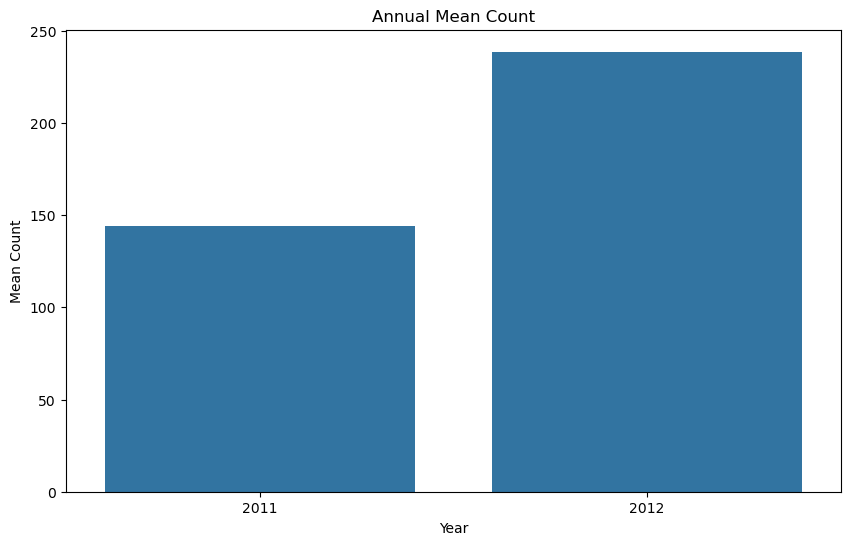

In [113]:
plt.figure(figsize=(10, 6))
sns.barplot(data=train_df, x='year', y='count', errorbar = None)
plt.title('Annual Mean Count')
plt.xlabel('Year')
plt.ylabel('Mean Count')
plt.show()

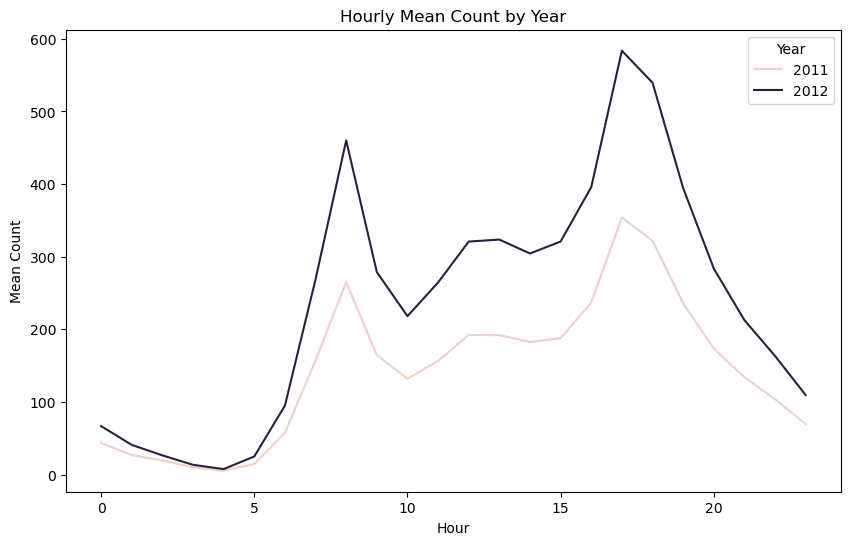

In [115]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=train_df, x='hour', y='count', hue='year', errorbar=None)
plt.title('Hourly Mean Count by Year')
plt.xlabel('Hour')
plt.ylabel('Mean Count')
plt.legend(title='Year')
plt.show()

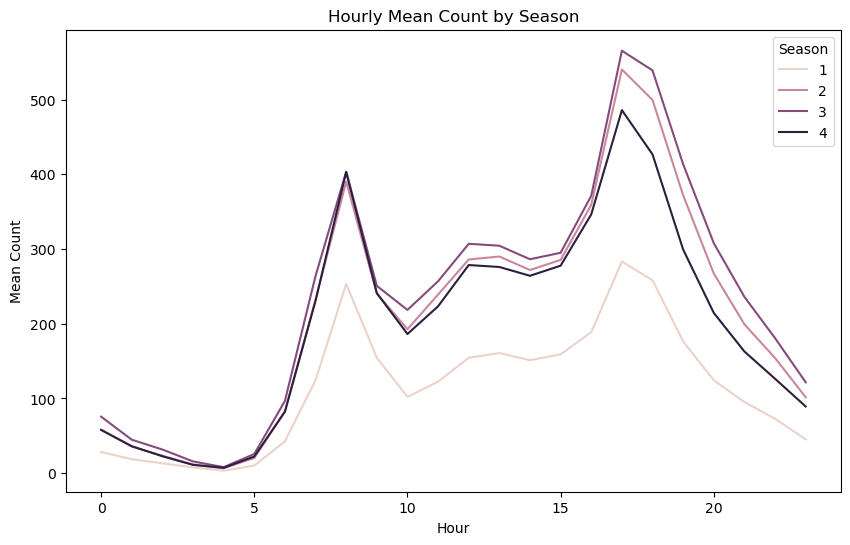

In [117]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=train_df, x='hour', y='count', hue='season', errorbar=None)
plt.title('Hourly Mean Count by Season')
plt.xlabel('Hour')
plt.ylabel('Mean Count')
plt.legend(title='Season')
plt.show()

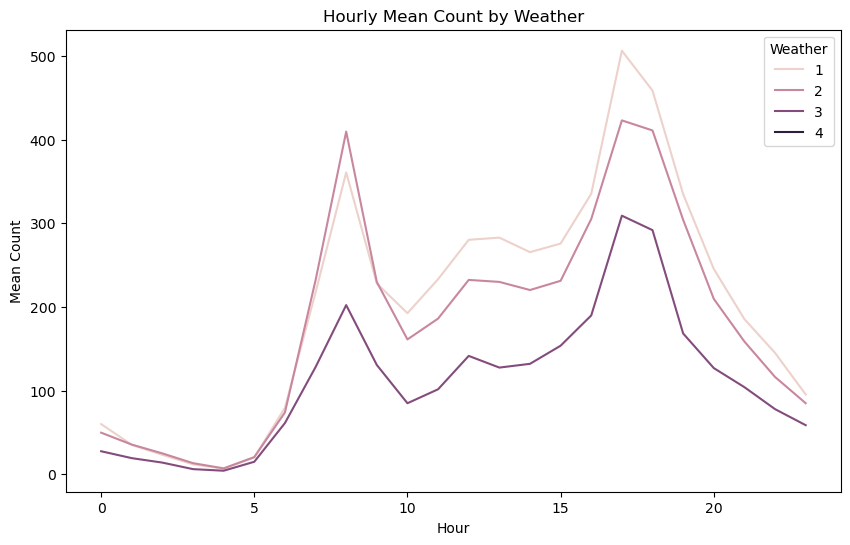

In [119]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=train_df, x='hour', y='count', hue='weather', errorbar=None)
plt.title('Hourly Mean Count by Weather')
plt.xlabel('Hour')
plt.ylabel('Mean Count')
plt.legend(title='Weather')
plt.show()

In [121]:
train_df['weather'].value_counts()

weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64

In [123]:
train_df['temp'].unique() 

array([ 9.84,  9.02,  8.2 , 13.12, 15.58, 14.76, 17.22, 18.86, 18.04,
       16.4 , 13.94, 12.3 , 10.66,  6.56,  5.74,  7.38,  4.92, 11.48,
        4.1 ,  3.28,  2.46, 21.32, 22.96, 23.78, 24.6 , 19.68, 22.14,
       20.5 , 27.06, 26.24, 25.42, 27.88, 28.7 , 30.34, 31.16, 29.52,
       33.62, 35.26, 36.9 , 32.8 , 31.98, 34.44, 36.08, 37.72, 38.54,
        1.64,  0.82, 39.36, 41.  ])

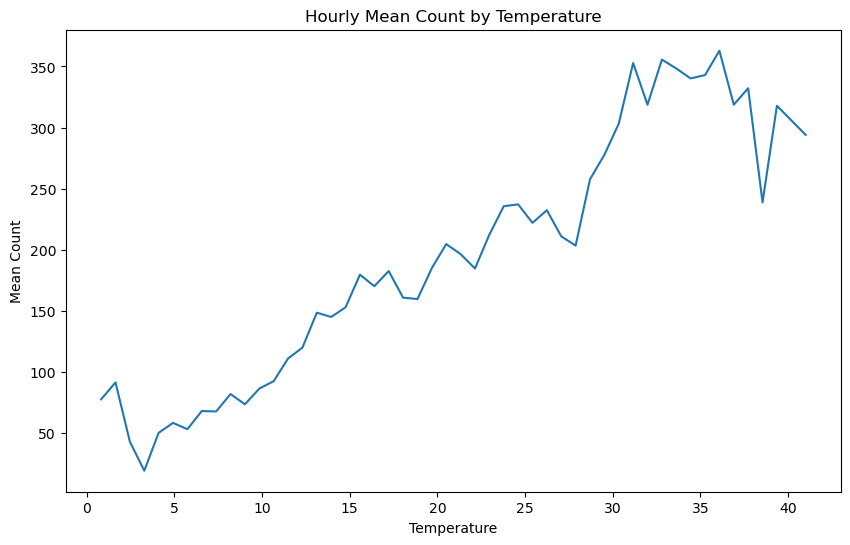

In [125]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=train_df, x='temp', y='count', errorbar=None)
plt.title('Hourly Mean Count by Temperature')
plt.xlabel('Temperature')
plt.ylabel('Mean Count')
plt.show()

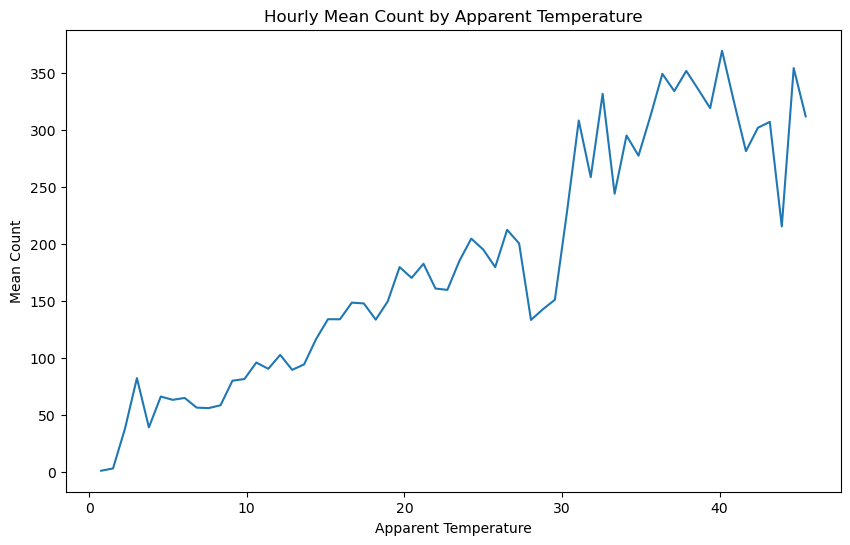

In [127]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=train_df, x='atemp', y='count', errorbar=None)
plt.title('Hourly Mean Count by Apparent Temperature')
plt.xlabel('Apparent Temperature')
plt.ylabel('Mean Count')
plt.show()

### 모델 개선하기 I : day_of_week 변수 추가하기

In [129]:
train_df['day_of_week'] = train_df['datetime'].dt.dayofweek
test_df['day_of_week'] = test_df['datetime'].dt.dayofweek

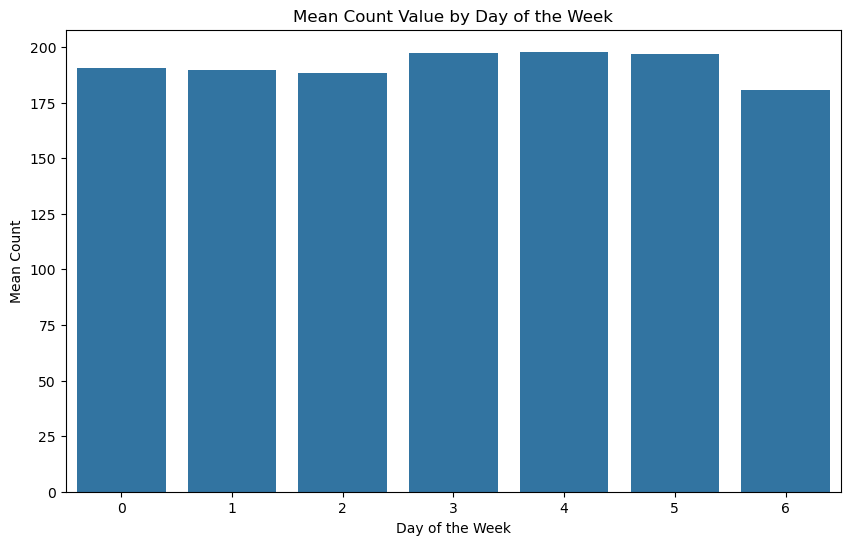

In [131]:
plt.figure(figsize=(10, 6))
sns.barplot(data=train_df, x='day_of_week', y='count', errorbar=None)
plt.title('Mean Count Value by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Mean Count')
plt.show()

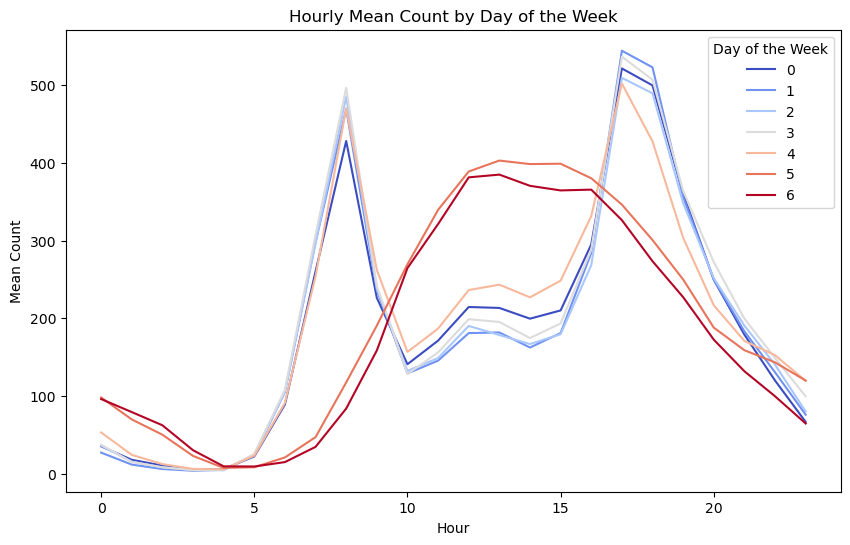

In [133]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=train_df, x='hour', y='count', hue='day_of_week', errorbar=None, palette='coolwarm')
plt.title('Hourly Mean Count by Day of the Week')
plt.xlabel('Hour')
plt.ylabel('Mean Count')
plt.legend(title='Day of the Week')
plt.show()

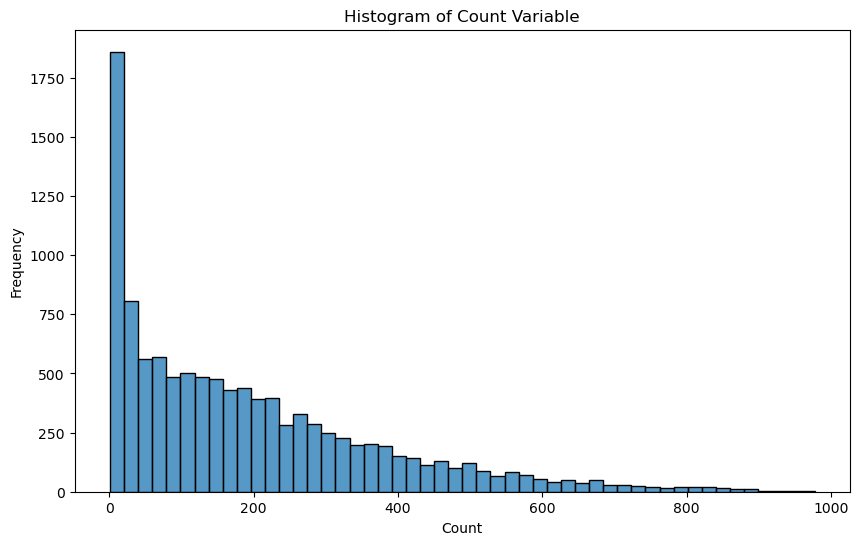

In [135]:
plt.figure(figsize=(10, 6))
sns.histplot(train_df['count'], bins=50)
plt.title('Histogram of Count Variable')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.show()

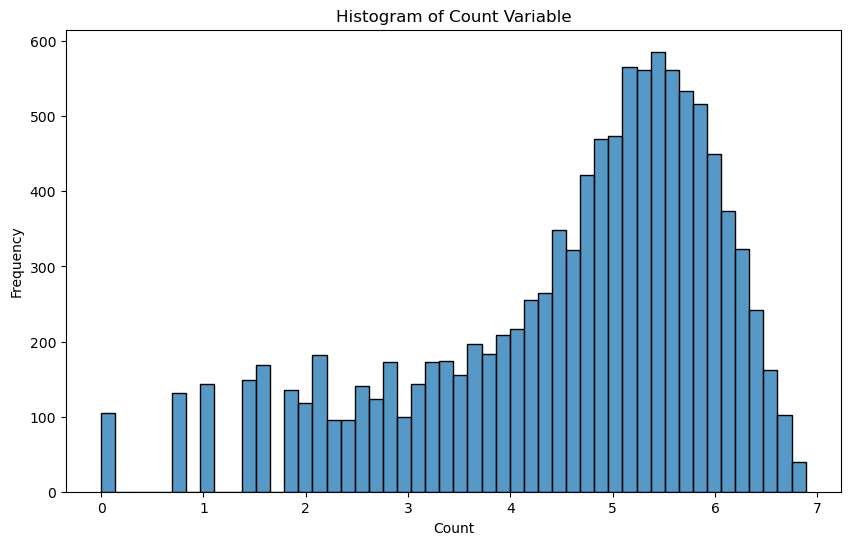

In [137]:
plt.figure(figsize=(10, 6))
sns.histplot(np.log(train_df['count']), bins=50)
plt.title('Histogram of Count Variable')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.show()

In [139]:
# 모델 초기화 및 학습
model = LinearRegression()
model.fit(X_train, np.log1p(y_train))

# 검증 데이터에 대한 예측
y_valid_pred = model.predict(X_valid)
y_valid_pred = np.maximum(1, np.expm1(y_valid_pred))

# RMSLE 계산
rmsle = np.sqrt(mean_squared_log_error(y_valid, y_valid_pred))
print(f'\nValidation Data RMSLE: {rmsle:.5f}')

# 테스트 데이터에 대한 예측
y_test_pred = model.predict(X_test)
y_test_pred = np.maximum(1, np.expm1(y_test_pred))


Validation Data RMSLE: 1.02566


In [141]:
submission_df['count'] = y_test_pred
submission_df.to_csv('submission_1.csv', index=False)

### 모델 개선하기 II : Random Forest 모델 사용 및 습도 값 전처리

In [143]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42)

In [145]:
X, y = separate_train(train_df)
X_test = separate_test(test_df)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 초기화 및 학습
model.fit(X_train, np.log1p(y_train))

# 검증 데이터에 대한 예측
y_valid_pred = model.predict(X_valid)
y_valid_pred = np.maximum(1, np.expm1(y_valid_pred))

rmsle = np.sqrt(mean_squared_log_error(y_valid, y_valid_pred))
print(f'Validation Data RMSLE: {rmsle:.5f}')

Validation Data RMSLE: 0.30474


In [147]:
y_test_pred = model.predict(X_test)
y_test_pred = np.maximum(1, np.expm1(y_test_pred))

submission_df['count'] = y_test_pred
submission_df.to_csv('submission_2-1.csv', index=False)

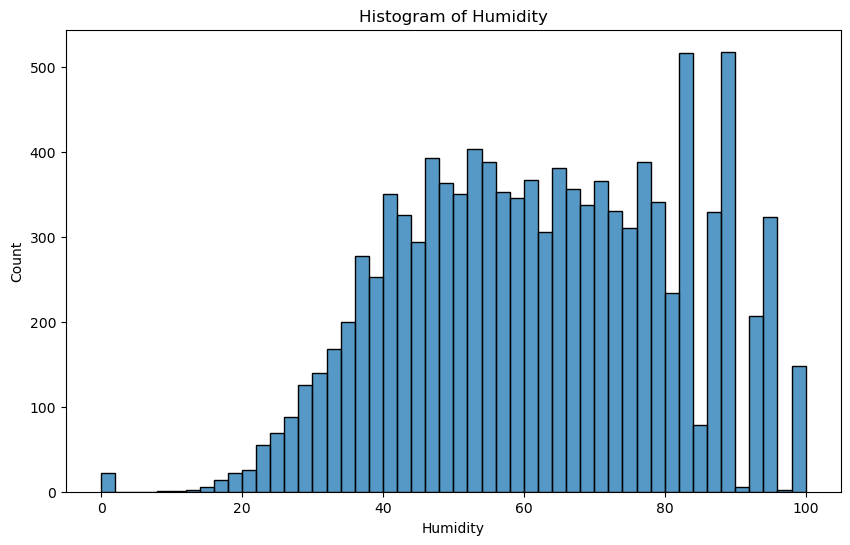

In [149]:
plt.figure(figsize=(10, 6))
sns.histplot(train_df['humidity'], bins=50)
plt.title('Histogram of Humidity')
plt.xlabel('Humidity')
plt.ylabel('Count')
plt.show()


In [151]:
train_df['humidity'].min()

0

In [153]:
train_df[train_df['humidity'] == 0]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,day_of_week
1091,2011-03-10 00:00:00,1,0,1,3,13.94,15.910,0,16.9979,3,0,3,2011,3,10,0,3
1092,2011-03-10 01:00:00,1,0,1,3,13.94,15.910,0,16.9979,0,2,2,2011,3,10,1,3
1093,2011-03-10 02:00:00,1,0,1,3,13.94,15.910,0,16.9979,0,1,1,2011,3,10,2,3
1094,2011-03-10 05:00:00,1,0,1,3,14.76,17.425,0,12.9980,1,2,3,2011,3,10,5,3
1095,2011-03-10 06:00:00,1,0,1,3,14.76,16.665,0,22.0028,0,12,12,2011,3,10,6,3
1096,2011-03-10 07:00:00,1,0,1,3,15.58,19.695,0,15.0013,1,36,37,2011,3,10,7,3
1097,2011-03-10 08:00:00,1,0,1,3,15.58,19.695,0,19.0012,1,43,44,2011,3,10,8,3
1098,2011-03-10 09:00:00,1,0,1,3,16.40,20.455,0,15.0013,1,23,24,2011,3,10,9,3
1099,2011-03-10 10:00:00,1,0,1,3,16.40,20.455,0,11.0014,0,17,17,2011,3,10,10,3
1100,2011-03-10 11:00:00,1,0,1,3,16.40,20.455,0,16.9979,6,5,11,2011,3,10,11,3


In [155]:
avg_humidity = train_df.humidity.mean()
train_df.loc[train_df['humidity'] == 0, 'humidity'] = avg_humidity

C:\Users\leoyo\AppData\Local\Temp\ipykernel_39840\882745272.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '61.88645967297446' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  train_df.loc[train_df['humidity'] == 0, 'humidity'] = avg_humidity


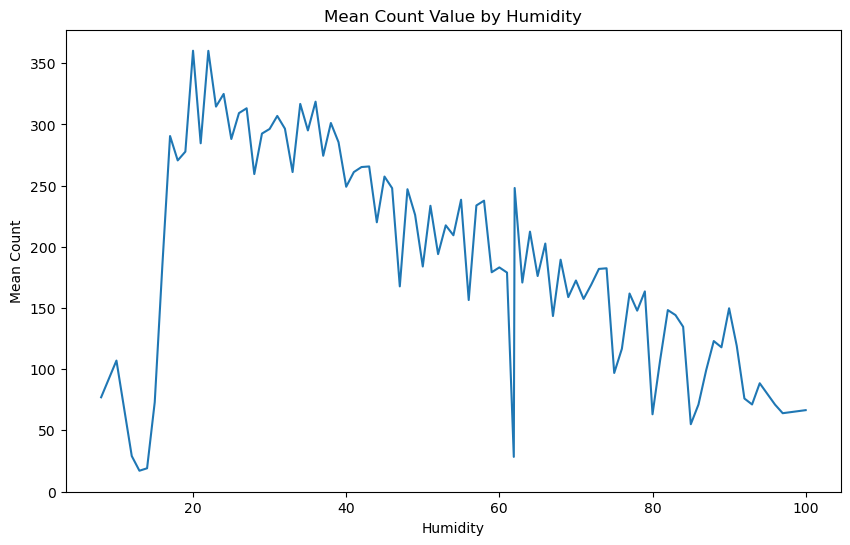

In [157]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=train_df, x='humidity', y='count', errorbar=None)
plt.title('Mean Count Value by Humidity')
plt.xlabel('Humidity')
plt.ylabel('Mean Count')
plt.show()

In [159]:
X, y = separate_train(train_df)
X_test = separate_test(test_df)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 초기화 및 학습
model = RandomForestRegressor(random_state=42)
model.fit(X_train, np.log1p(y_train))

# 검증 데이터에 대한 예측
y_valid_pred = model.predict(X_valid)
y_valid_pred = np.maximum(1, np.expm1(y_valid_pred))

rmsle = np.sqrt(mean_squared_log_error(y_valid, y_valid_pred))
print(f'Validation Data RMSLE: {rmsle:.5f}')

Validation Data RMSLE: 0.30472


In [161]:
y_test_pred = model.predict(X_test)
y_test_pred = np.maximum(1, np.expm1(y_test_pred))

submission_df['count'] = y_test_pred
submission_df.to_csv('submission_2-2.csv', index=False)

### 모델 개선하기 III : daytype 변수 추가하기

In [163]:
train_df['holiday'].value_counts()

holiday
0    10575
1      311
Name: count, dtype: int64

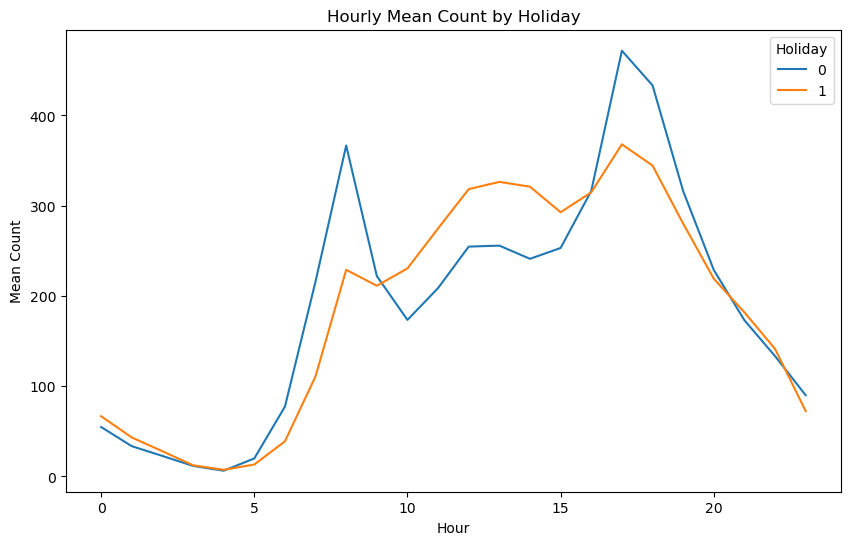

In [165]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=train_df, x='hour', y='count', hue='holiday', errorbar=None)
plt.title('Hourly Mean Count by Holiday')
plt.xlabel('Hour')
plt.ylabel('Mean Count')
plt.legend(title='Holiday')
plt.show()

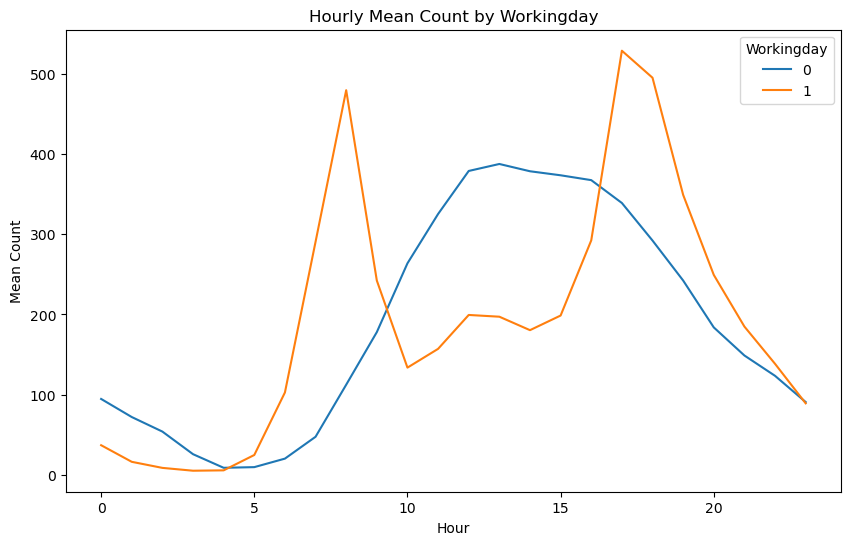

In [167]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=train_df, x='hour', y='count', hue='workingday', errorbar = None)
plt.title('Hourly Mean Count by Workingday')
plt.xlabel('Hour')
plt.ylabel('Mean Count')
plt.legend(title='Workingday')
plt.show()

In [169]:
train_df['daytype'] = 0
train_df.loc[train_df['day_of_week'] == 4, 'daytype'] = 1  # 금요일
train_df.loc[train_df['workingday'] == 0, 'daytype'] = 2 # 비영업일

test_df['daytype'] = 0
test_df.loc[test_df['day_of_week'] == 4, 'daytype'] = 1  # 금요일
test_df.loc[test_df['workingday'] == 0, 'daytype'] = 2 # 비영업일

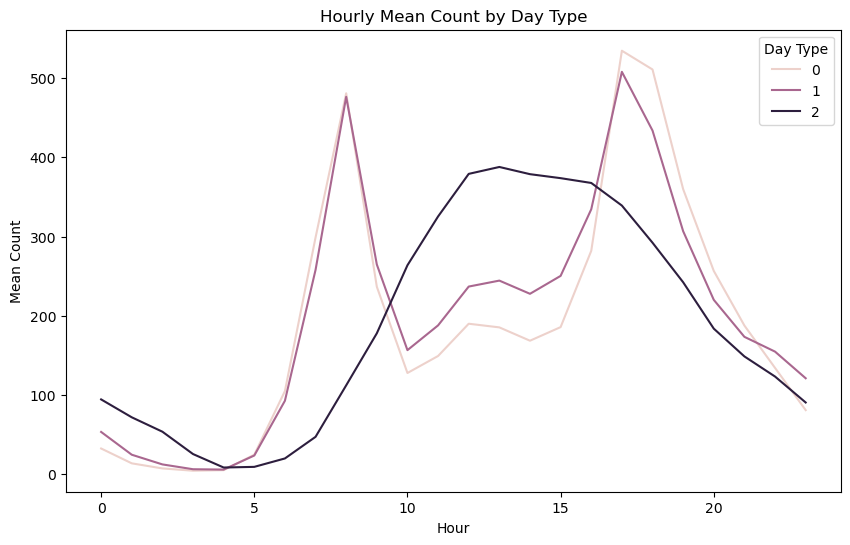

In [171]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=train_df, x='hour', y='count', hue='daytype', errorbar=None)
plt.title('Hourly Mean Count by Day Type')
plt.xlabel('Hour')
plt.ylabel('Mean Count')
plt.legend(title='Day Type')
plt.show()

In [173]:
train_df = train_df.drop(columns='workingday')
test_df = test_df.drop(columns='workingday')

In [175]:
X, y = separate_train(train_df)
X_test = separate_test(test_df)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 초기화 및 학습
model = RandomForestRegressor(random_state=42)
model.fit(X_train, np.log1p(y_train))

# 검증 데이터에 대한 예측
y_valid_pred = model.predict(X_valid)
y_valid_pred = np.maximum(1, np.expm1(y_valid_pred))

rmsle = np.sqrt(mean_squared_log_error(y_valid, y_valid_pred))
print(f'Validation Data RMSLE: {rmsle:.5f}')

Validation Data RMSLE: 0.30277


In [177]:
y_test_pred = model.predict(X_test)
y_test_pred = np.maximum(1, np.expm1(y_test_pred))

submission_df['count'] = y_test_pred
submission_df.to_csv('submission_3.csv', index=False)

### 모델 개선하기 IV : 평균값 파생 피쳐와 변수 선택

In [179]:
groupby_df = train_df.groupby('hour')['count'].mean().reset_index()
groupby_df.columns = ['hour', 'mean_count_by_hour']
groupby_df.head()

,hour,mean_count_by_hour
0,0,55.138462
1,1,33.859031
2,2,22.899554
3,3,11.757506
4,4,6.407240


In [181]:
train_df = train_df.merge(groupby_df, on='hour', how='left')
test_df = test_df.merge(groupby_df, on='hour', how='left')

In [183]:
groupby_df = train_df.groupby(['daytype', 'hour'])['count'].mean().reset_index()
groupby_df.columns = ['daytype', 'hour', 'mc_daytype_hour']

In [185]:
train_df = train_df.merge(groupby_df, on=['daytype', 'hour'], how='left')
test_df = test_df.merge(groupby_df, on=['daytype', 'hour'], how='left')

In [187]:
train_df.head()

,datetime,season,holiday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,day_of_week,daytype,mean_count_by_hour,mc_daytype_hour
0,2011-01-01 00:00:00,1,0,1,9.84,14.395,81.0,0.0,3,13,16,2011,1,1,0,5,2,55.138462,94.489655
1,2011-01-01 01:00:00,1,0,1,9.02,13.635,80.0,0.0,8,32,40,2011,1,1,1,5,2,33.859031,71.910345
2,2011-01-01 02:00:00,1,0,1,9.02,13.635,80.0,0.0,5,27,32,2011,1,1,2,5,2,22.899554,53.748252
3,2011-01-01 03:00:00,1,0,1,9.84,14.395,75.0,0.0,3,10,13,2011,1,1,3,5,2,11.757506,25.534722
4,2011-01-01 04:00:00,1,0,1,9.84,14.395,75.0,0.0,0,1,1,2011,1,1,4,5,2,6.407240,8.544828


In [189]:
test_df.head()

,datetime,season,holiday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,day_of_week,daytype,mean_count_by_hour,mc_daytype_hour
0,2011-01-20 00:00:00,1,0,1,10.66,11.365,56,26.0027,2011,1,20,0,3,0,55.138462,32.552419
1,2011-01-20 01:00:00,1,0,1,10.66,13.635,56,0.0000,2011,1,20,1,3,0,33.859031,13.821862
2,2011-01-20 02:00:00,1,0,1,10.66,13.635,56,0.0000,2011,1,20,2,3,0,22.899554,7.407407
3,2011-01-20 03:00:00,1,0,1,10.66,12.880,56,11.0014,2011,1,20,3,3,0,11.757506,4.502183
4,2011-01-20 04:00:00,1,0,1,10.66,12.880,56,11.0014,2011,1,20,4,3,0,6.407240,5.225000


In [193]:
X, y = separate_train(train_df)
X_test = separate_test(test_df)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 초기화 및 학습
model = RandomForestRegressor(random_state=42)
model.fit(X_train, np.log1p(y_train))

# 검증 데이터에 대한 예측
y_valid_pred = model.predict(X_valid)
y_valid_pred = np.maximum(1, np.expm1(y_valid_pred))

rmsle = np.sqrt(mean_squared_log_error(y_valid, y_valid_pred))
print(f'Validation Data RMSLE: {rmsle:.5f}')

Validation Data RMSLE: 0.30296


In [195]:
y_test_pred = model.predict(X_test)
y_test_pred = np.maximum(1, np.expm1(y_test_pred))

submission_df['count'] = y_test_pred
submission_df.to_csv('submission_4-1.csv', index=False)

In [197]:
drop_features = ['day', 'month', 'atemp']

train_df = train_df.drop(drop_features, axis=1)
test_df = test_df.drop(drop_features, axis=1)

In [199]:
X, y = separate_train(train_df)
X_test = separate_test(test_df)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 초기화 및 학습
model = RandomForestRegressor(random_state=42)
model.fit(X_train, np.log1p(y_train))

# 검증 데이터에 대한 예측
y_valid_pred = model.predict(X_valid)
y_valid_pred = np.maximum(1, np.expm1(y_valid_pred))

rmsle = np.sqrt(mean_squared_log_error(y_valid, y_valid_pred))
print(f'Validation Data RMSLE: {rmsle:.5f}')

Validation Data RMSLE: 0.31260


In [201]:
y_test_pred = model.predict(X_test)
y_test_pred = np.maximum(1, np.expm1(y_test_pred))

submission_df['count'] = y_test_pred
submission_df.to_csv('submission_4-2.csv', index=False)

### 모델 개선하기 V : 하이퍼파라미터 튜닝

In [203]:
from sklearn.model_selection import GridSearchCV

X, y = separate_train(train_df)
X_test = separate_test(test_df)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# 하이퍼 파라미터 초기 설정
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [4, 6, 8],
}

In [205]:
model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, np.log1p(y_train))

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [4, 6, 8],
                         'n_estimators': [50, 100, 200]})

In [206]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': None, 'min_samples_split': 6, 'n_estimators': 200}


In [207]:
best_model = grid_search.best_estimator_

In [208]:
y_valid_pred = best_model.predict(X_valid)
y_valid_pred = np.maximum(1, np.expm1(y_valid_pred))

y_test_pred = best_model.predict(X_test)
y_test_pred = np.maximum(1, np.expm1(y_test_pred))
rmsle = np.sqrt(mean_squared_log_error(y_valid, y_valid_pred))
print(f'Validation Data RMSLE: {rmsle:.5f}')

Validation Data RMSLE: 0.30863


In [209]:
submission_df['count'] = y_test_pred
submission_df.to_csv('submission_5.csv', index=False)